In [1]:
"""
    Name: Sakar Joshi               Project: Final Project of CS 3200: Introduction to Machine Learning
    BGSU ID: 0020400903             Purpose: Using KNN to classify handwritten digits
    Date: 11/30/2022
"""

'\n    Name: Sakar Joshi               Project: Final Project of CS 3200: Introduction to Machine Learning\n    BGSU ID: 0020400903             Purpose: Using KNN to classify handwritten digits\n    Date: 11/30/2022\n'

In [10]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split  # Split data into training and testing set
from sklearn.neighbors import KNeighborsClassifier  # KNN
# from sklearn.metrics import confusion_matrix, classification_report  # To check accuracy
import time

In [12]:
"""For this project, the data from mnist was used."""

dfile = pd.read_csv("mnist.csv")

data = dfile.values

In [14]:
#slicing the data
X = data[:,1:]    
Y = data[:,0]

# Splitting the data into train-test 70-30. Validation set was used and showed the same result.
# train is now 70% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=0)

In [17]:
#To see the data directly from data set. And testing.
def imgDraw(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

#Euclidean distance is used for distance
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))   
                       

0.0


In [33]:
#Tuning k
# Calculating distortion to optimize K
distortions = []

# Timing the tuning period
start = time.time()
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    distortions.append([np.mean(pred_i != Y_test)])
print((time.time() - start) * 1000) 

150942.9907798767


Text(0, 0.5, 'Error')

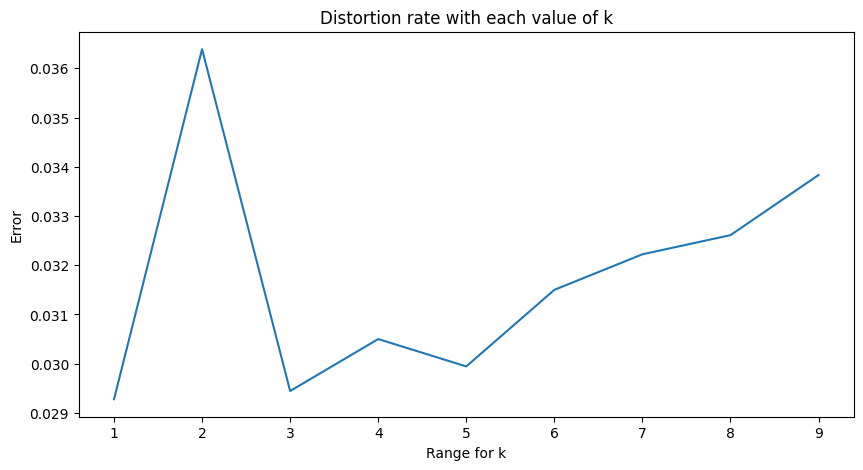

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.title("Distortion rate with each value of k")
plt.xlabel("Range for k")
plt.ylabel("Error")

In [40]:
# KNN
def knn(X,Y,point,k=3):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(point,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    #nearest first k points
    
    vals = vals[:k]
    vals = np.array(vals)
 
    new_vals = np.unique(vals[:,1],return_counts = True)
    
    # To find the max
    index = new_vals[1].argmax() 
    pred = new_vals[0][index]
    # print(index, pred)
    return pred

In [26]:
pred = knn(X_train,Y_train,X_test[5]) #calling the prediction function and passing the training data
print(int(pred))

3


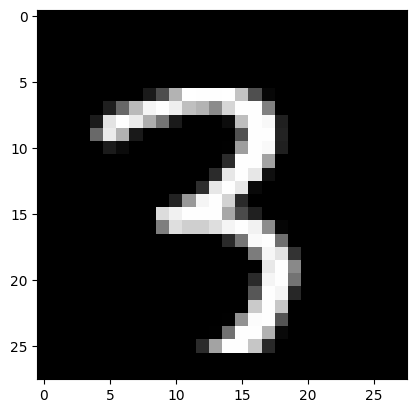

3


In [28]:
imgDraw(X_test[5]) #calling our testing function to test our prediction is correct or not 
print(Y_test[5])

In [30]:
# Calculating the accuracy of our model 
pred_lst = []
def getaccuracy(X_train,Y_train):
    correct = 0
    for i in range(100):
        pred = int(knn(X_train,Y_train,X_test[i]))
        print(pred)
        pred_lst.append(pred)
        if pred == Y_test[i]:
            correct+=1
      
    return (correct/float(100))*100
    
getaccuracy(X_train,Y_train)
# print(r2_score(pred_lst, Y_test))

3
6
6
6
0
3
6
2
5
6
5
8
0
0
0
1
2
2
9
3
6
9
8
7
0
0
3
7
0
6
9
7
3
4
0
4
0
8
7
7
8
8
2
9
2
5
1
7
9
2
3
6
4
3
5
9
8
4
7
3
3
1
6
6
6
2
2
9
4
1
3
1
1
1
4
8
5
4
0
9
5
8
2
4
0
1
2
1
1
3
4
7
1
1
4
2
0
8
1
9


99.0

In [ ]:
# End of the program with accuracy measured to be 98.0%.
#Y_pred = knn(X_train, Y_train, X_test)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))